## <center> Import Libs

In [28]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 18

import visualkeras

## <center> Import Data

In [29]:
fashion = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"X_tests shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_tests shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


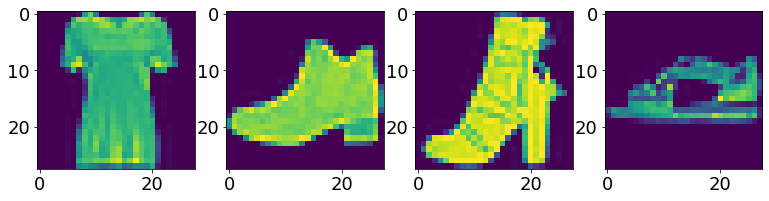

In [30]:
fig, ax = plt.subplots(ncols=4, nrows=1)

ax[0].imshow(X_train[10])
ax[1].imshow(X_train[15])
ax[2].imshow(X_train[11])
ax[3].imshow(X_train[13])

## <center> Building a Neural network structure

In [31]:
model = keras.models.Sequential([
    keras.layers.Conv2D(
        32, 
        kernel_size=(3, 3),
        activation='relu',
        input_shape = [28,28,1]
    ),

    keras.layers.Conv2D(
        64, 
        kernel_size=(3, 3),
        activation='relu'
    ),

    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

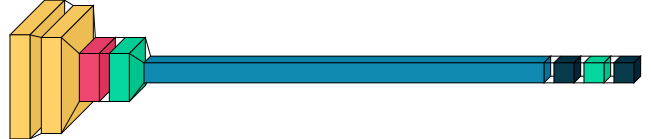

In [32]:
visualkeras.layered_view(model)

## <center> Train / Validation data split

In [33]:
val_data_splitter = 55000

X_train, X_val = X_train[:val_data_splitter]/255.0, X_train[val_data_splitter:]/255.0
y_train, y_val = y_train[:val_data_splitter], y_train[val_data_splitter:]

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (55000, 28, 28)
X_val shape: (5000, 28, 28)
y_train shape: (55000,)
y_val shape: (5000,)


## <center> Run Model

In [34]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 10, 
    validation_data = (X_val, y_val)
)

Epoch 1/10
   5/1719 [..............................] - ETA: 26s - loss: 2.2424 - accuracy: 0.2375 

2022-08-16 10:57:06.387240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.4575 - accuracy: 0.8400

2022-08-16 10:57:30.310312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 25s 15ms/step - loss: 0.4575 - accuracy: 0.8400 - val_loss: 0.2783 - val_accuracy: 0.8970
Epoch 2/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2930 - accuracy: 0.8946 - val_loss: 0.2454 - val_accuracy: 0.9122
Epoch 3/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2422 - accuracy: 0.9117 - val_loss: 0.2183 - val_accuracy: 0.9178
Epoch 4/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2135 - accuracy: 0.9210 - val_loss: 0.2178 - val_accuracy: 0.9208
Epoch 5/10
1719/1719 [==============================] - 27s 15ms/step - loss: 0.1922 - accuracy: 0.9294 - val_loss: 0.2154 - val_accuracy: 0.9210
Epoch 6/10
1719/1719 [==============================] - 25s 15ms/step - loss: 0.1723 - accuracy: 0.9359 - val_loss: 0.2175 - val_accuracy: 0.9262
Epoch 7/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.1563 - accuracy: 0.9423 - val_loss: 0.2346 - val_accura

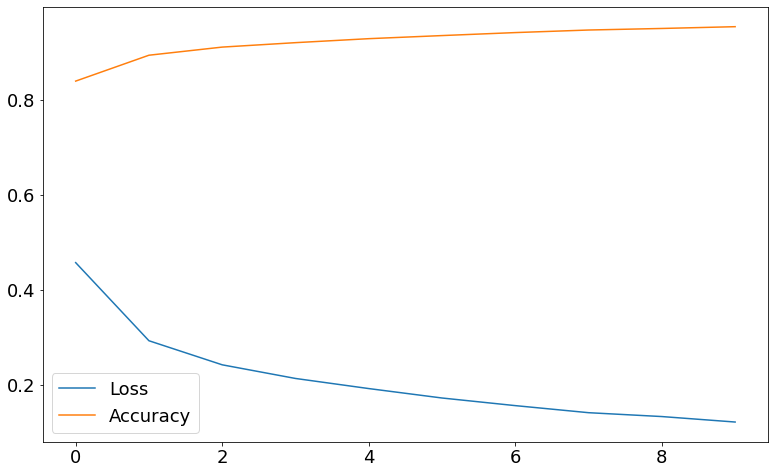

In [35]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.legend()